# Clustering Analysis

As we approach to the last step of exploring this basketball player dataset, I am going to use unsupervised learning methods to cluster the players into categories that can better summarizes the unique characters of its members. The main idea is to get over the “curse of dimensionality” i.e, boil down a large dataset by removing extra umimportant attributes and extract the essence of the data. I will use Principal Component Analysis (PCA) to find the most crucial sttributes of the dataset and use K-means Clustering to optimaly categorize the data. 

Lets first start by loading the python libraries.

In [1828]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import cluster as skc
import sklearn as skl
import sklearn.preprocessing
%matplotlib inline
import csv

I will continue to use the cleansed version of player season data, and I will create an all numerical version of it by removing string columns for following reasons.

1. String columns include player names, player team, player positions, among these player name does not effect the performance of player. Player team can affect player performance due to the game style for each team, but consider the fact that the game style is very much determined by the coach, which is highly inconsistent throughout the time, therefore the player team column will also not be considered. The other non-numerical attribute is player position, which is the traditional way of categorizing player characteristics, but since our purpose is to redefine a way to categorize players, so we do not have to include this column.
2. For computational purpose, only numerical data can be the function input.

In [1829]:
with open('data/Seasons_Stats_cleansed.csv') as csvfile:
    reader1 = csv.reader(csvfile)
data = pd.read_csv('data/Seasons_Stats_cleansed.csv',sep='\t')

str_list = [] # empty list to contain columns with strings
for colname, colvalue in data.iteritems():
    if type(colvalue[1]) == str:
        str_list.append(colname)
#Get to the numeric columns by inversion
data_num_list = data.columns.difference(str_list)
data_num = data[data_num_list]

Both the original dataset and all numerical dataset will be divided into four subsets according to time period.

In [1830]:
pre90s_all = data[data['Year']<1990]
_90s_all = data[(data['Year']>1989) & (data['Year']<2000)]
_00s_all = data[(data['Year']>1999) & (data['Year']<2010)]
_10s_all = data[data['Year'] > 2009]

In [1831]:
pre90s = data_num[data_num['Year']<1990]
_90s = data_num[(data_num['Year']>1989) & (data_num['Year']<2000)]
_00s = data_num[(data_num['Year']>1999) & (data_num['Year']<2010)]
_10s = data_num[data_num['Year'] > 2009]

Since we want to observe the changing behavior of basketball throughout time, I will choose the two subsets have the largest time gap in between, which is pre90(players data before 1990) and _10s(players since 2010).

Now, that we have selected the data we need to standardize the data. We will standardize the data by defining a function for standardization.

In [1832]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(_10s_z)

#_10s_z = _10s.apply(standardization_f, broadcast = True)
_10s_z.head()

,2P,2P%,2PA,3P,3P%,3PA,3PAr,AST,AST%,Age,...,Unnamed: 0,Unnamed: 0.1,VORP,WS,WS/48,Year,eFG%,height,weight,cluster_ID
9290,-0.938818,0.078233,-1.014302,0.689031,1.028820,0.370043,0.809270,-0.406370,-0.472693,-0.643896,...,-1.739685,-1.741503,0.289801,-0.047769,-0.064845,-1.555639,1.158798,-0.490777,-0.358989,1
9291,1.624303,0.257408,1.650508,-1.111994,0.245125,-1.184604,-1.193365,-0.535781,-0.408557,-0.643896,...,-1.738443,-1.740056,0.739534,0.905728,0.914500,-1.555639,-0.060989,1.139415,1.420452,2
9292,-0.419429,-1.337246,-0.029195,-1.093498,-0.700491,-1.072605,-1.008655,-0.880822,-0.921647,1.050877,...,-1.737201,-1.738609,-1.546497,-1.569687,-1.598537,-1.555639,-2.012649,0.813376,1.258685,4
9293,-0.116779,1.296620,-0.441110,0.796900,0.568966,0.799073,0.731498,-0.189544,-0.152012,1.777208,...,-1.735958,-1.737886,0.787555,0.720250,0.729718,-1.555639,1.036819,0.269979,-0.035455,1
9294,0.551099,0.651592,0.384115,-1.177683,-1.782119,-1.182437,-1.164200,-0.075602,-0.077186,0.324546,...,-1.734716,-1.737162,0.422136,0.130567,0.082981,-1.555639,0.203298,-0.816816,-0.278106,4


As you see, all the numerical attributes have been normalized to the range from 0 to 1 despite the nature of its original scope, so that bias will not be triggered due to various magnitude in different numeric attribute. 

### Principal Component Analysis
Principal component analysis is a unsupervised machine learning algorithm which reduces the dimensionality of the data by eigenvalue and eigenvector decomposition of the covariance matrix.

Lets first start by computing the co-variance matrix of the standardized data.

In [1833]:
pre90s_RR = pre90s_z.cov()
_10s_RR = _10s_z.cov()

_10s_RR.head(5)

pre90s_eigen_RR = np.linalg.eig(pre90s_RR)
_10s_eigen_RR = np.linalg.eig(_10s_RR)
print(_10s_eigen_RR[0])
print(_10s_eigen_RR[1][1:3])

# Proportion of variance explained by each PC.
print(pre90s_eigen_RR[0] / sum(pre90s_eigen_RR[0]))

print(_10s_eigen_RR[0] / sum(_10s_eigen_RR[0]))

tot = sum(pre90s_eigen_RR[0])
pre90s_var_exp = [(i/tot)*100 for i in sorted(pre90s_eigen_RR[0], reverse=True)] # Individual explained variance
pre90s_cum_var_exp = np.cumsum(pre90s_var_exp) # Cumulative explained variance

tot = sum(_10s_eigen_RR[0])
_10s_var_exp = [(i/tot)*100 for i in sorted(_10s_eigen_RR[0], reverse=True)] # Individual explained variance
_10s_cum_var_exp = np.cumsum(_10s_var_exp) # Cumulative explained variance

[ 1.56432947e+01+0.00000000e+00j  9.88686925e+00+0.00000000e+00j
  5.04276977e+00+0.00000000e+00j  3.84056880e+00+0.00000000e+00j
  3.10861791e+00+0.00000000e+00j  2.52554274e+00+0.00000000e+00j
  1.91923650e+00+0.00000000e+00j  1.42697587e+00+0.00000000e+00j
  1.37847319e+00+0.00000000e+00j  1.30255867e+00+0.00000000e+00j
  1.12541685e+00+0.00000000e+00j  9.40189406e-01+0.00000000e+00j
  7.64731052e-01+0.00000000e+00j  6.70493039e-01+0.00000000e+00j
  6.36440149e-01+0.00000000e+00j  5.32328264e-01+0.00000000e+00j
  4.84212777e-01+0.00000000e+00j  4.18140209e-01+0.00000000e+00j
  3.80764056e-01+0.00000000e+00j  2.96525391e-01+0.00000000e+00j
  2.35081425e-01+0.00000000e+00j  1.98538021e-01+0.00000000e+00j
  1.77405748e-01+0.00000000e+00j  1.43070828e-01+0.00000000e+00j
  1.02339858e-01+0.00000000e+00j  7.81652510e-02+0.00000000e+00j
  6.62993109e-02+0.00000000e+00j  5.62952237e-02+0.00000000e+00j
  3.09950156e-02+0.00000000e+00j  2.22369955e-02+0.00000000e+00j
  1.43092503e-02+0.000000

In [1834]:
#_10s_RR.head(5)

Then, calculate the eigenvalues and eigenvectors of covariance matrix.

In [1835]:
#pre90s_eigen_RR = np.linalg.eig(pre90s_RR)
#_10s_eigen_RR = np.linalg.eig(_10s_RR)
#print(_10s_eigen_RR[0])
#print(_10s_eigen_RR[1][1:3])

In this output, the first row is the eigenvalues for the 50 variables we have used in this dataset. The subsequent rows are the eigenvectors in 50 directions (first two directions in the above sample). The number of principal components is equal to the number of variables we have in the dataset. But, not all of the principal components are informative. To see, how many of them are informative or relevant, we calculate the proportion of variance explained by each PC. Now, lets see what proportion of variance is explained by the Principal components in this analysis.

In [1836]:
# Proportion of variance explained by each PC.
#print(pre90s_eigen_RR[0] / sum(pre90s_eigen_RR[0]))

For the pre90s players, the first two principal components explains 23.8% and 22.3% of the variance.

In [1837]:
#print(_10s_eigen_RR[0] / sum(_10s_eigen_RR[0]))

For the post 2010 players, the first two principal components explains 28% and 19.5% of the variance.

Since we want sufficient number of principal components to explains the vast majority of the total variance, let's say 75%, I will calculate all the cumulative percentage of explained variance after each additional component is included.

In [1838]:
#tot = sum(pre90s_eigen_RR[0])
#pre90s_var_exp = [(i/tot)*100 for i in sorted(pre90s_eigen_RR[0], reverse=True)] # Individual explained variance
#pre90s_cum_var_exp = np.cumsum(pre90s_var_exp) # Cumulative explained variance

In [1839]:
#tot = sum(_10s_eigen_RR[0])
#_10s_var_exp = [(i/tot)*100 for i in sorted(_10s_eigen_RR[0], reverse=True)] # Individual explained variance
#_10s_cum_var_exp = np.cumsum(_10s_var_exp) # Cumulative explained variance

In [1840]:
# pre90s_cum_var_exp

For pre90s dataset, the top six components reach 75%.

In [1841]:
# _10s_cum_var_exp

For post 2010 dataset, we also need top six components to reach 75%.

We can visualize this result.

/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:827: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


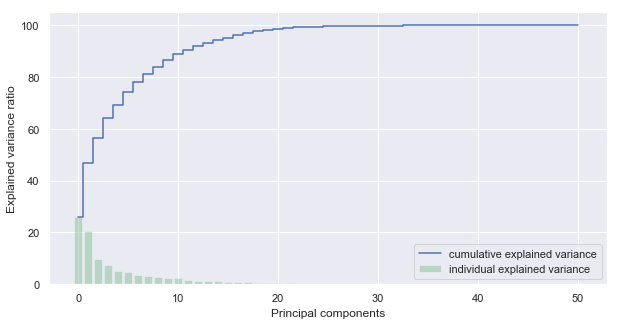

In [1842]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(len(pre90s_var_exp)), pre90s_var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(pre90s_cum_var_exp)), pre90s_cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

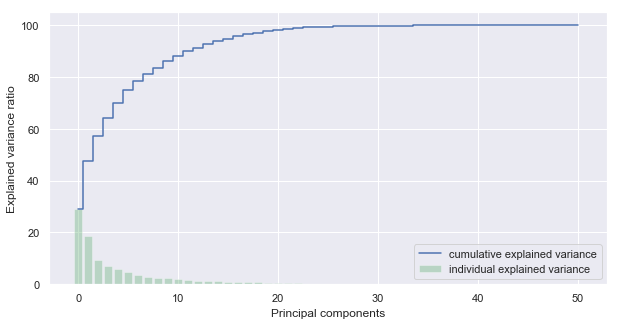

In [1843]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(_10s_var_exp)), _10s_var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(_10s_cum_var_exp)), _10s_cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

With both visualization we can conclude that first six PC are needed to explain 75% of the variance while the seventh explains only 3.9%(pre90s) and 3.8%(_10s) of the variance. So, for both dataset we will select only the first six PCs.

In [1844]:
# Compute first 6 PCs by matrix multiplying the standardized data array 
# by the first 6 columns of the array of eigenvectors.
#print(x_z.shape)
#print(type(x_z))
#print(eigen_RR[1].shape)
#pre90s_PCs = np.dot(pre90s_z, eigen_RR[1][:, :6])
#print(type(PCs))
#print(PCs.shape)
#print(PCs[:5, ])

### Dimensionality reduction with PCA

By using PCA we will be able to reduce these 50 variables to just the 6 of them that best captures that information.

In order to do so, we will first perform PCA implementation that comes with Python's sklearn machine learning library and plot the first six PCs for both datasets.

In [1891]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(pre90s_z)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

This gives us an object we can use to transform our data by calling transform.

In [1892]:
pre90s_existing_6d = pca.transform(pre90s_z)

We end up with a lower dimension representation of our data frame, as a numPy array. Let's put it in a new dataframe.

In [1847]:
#pre90s_existing_df_6d = pd.DataFrame(pre90s_existing_6d)
#pre90s_existing_df_6d.index = pre90s_z.index
#pre90s_existing_df_6d.columns = ['PC1','PC2','PC3','PC4','PC5','PC6']
#pre90s_existing_df_6d.head()

In [1903]:
pre90s_cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

[0.22410672 0.44415993 0.54572502 0.63954173 0.69086219 0.74056972
 0.78090444 0.81261153 0.83937228 0.86354665 0.88679869 0.90488028
 0.91853831 0.93099992 0.94240873 0.95211977 0.9612198  0.96945056
 0.97659224 0.98210494 0.98646862 0.98965596 0.99218341 0.99389759
 0.99523569 0.99633018 0.99726637 0.99806512 0.99854973 0.99892438
 0.99924152 0.99940508 0.99953267 0.99963383 0.99972503 0.999803
 0.99985842 0.99989424 0.99992531 0.9999501  0.99997213 0.99998718
 0.99999204 0.99999441 0.99999663 0.9999986  1.         1.
 1.         1.         1.        ]


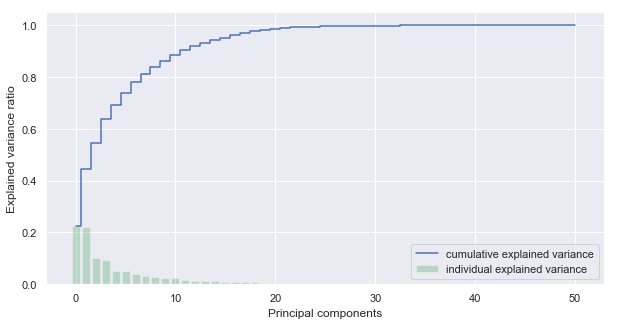

In [1904]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(pre90s_cum_var_exp)), pre90s_cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

Repeat the same steps for the post 2010 dataset.

In [1849]:
pca = PCA(n_components=6)
pca.fit(_10s_z)
_10s_existing_6d = pca.transform(_10s_z)
_10s_existing_df_6d = pd.DataFrame(_10s_existing_6d)
_10s_existing_df_6d.index = _10s_z.index
_10s_existing_df_6d.columns = ['PC1','PC2','PC3','PC4','PC5','PC6']
_10s_existing_df_6d.head()

,PC1,PC2,PC3,PC4,PC5,PC6
9290,-2.406361,-0.513600,-2.988860,-0.006189,-3.702575,-1.233482
9291,3.026116,1.843294,0.786797,-1.703865,-3.175023,-3.199479
9292,-1.173006,-6.884451,4.180876,0.429713,-2.831862,1.167018
9293,-1.598676,2.977363,-2.589893,-0.449420,-3.761323,-1.239934
9294,2.800339,-0.531867,1.650585,5.391265,-0.559463,-0.140999


With these two simplied dataset with reduced dimension of 6, we can explore the different choices of number for clustering. I will keep the options open from 2 to 20.

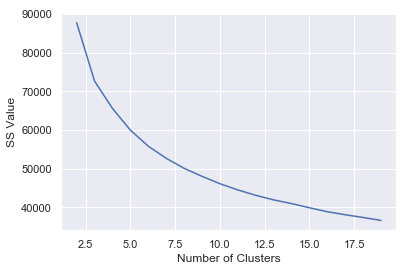

In [1850]:
from sklearn.cluster import KMeans

SS = []

for i in range(2,20):
    km = KMeans(n_clusters = i)
    km.fit(pre90s_existing_df_6d)
    SS.append(km.inertia_)
    
plt.plot(range(2,20), SS)
plt.xlabel('Number of Clusters')
plt.ylabel('SS Value')
plt.show()

By using the albew method, we can tell starting from 7, the SS value kind of stop decreasing as rapidly as before, so I will choose 7 as the number of clusters.

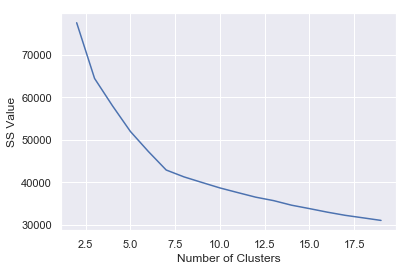

In [1851]:
SS = []

for i in range(2,20):
    km = KMeans(n_clusters = i)
    km.fit(_10s_existing_df_6d)
    SS.append(km.inertia_)
    
plt.plot(range(2,20), SS)
plt.xlabel('Number of Clusters')
plt.ylabel('SS Value')
plt.show()

For the 10s dataset, we can tell more clearly that starting from 7, the SS value stop decreasing so rapidly, so I will also choose 7 as the number of clusters.

In [1852]:
import scipy
from scipy.cluster.vq import vq, kmeans, whiten
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

#changing x_z from dataframe to an array
pre90s_z1 = np.array(pre90s_existing_df_6d)

##kmeans clustering for 7 clusters
pre90s_kmeans_x,_ = kmeans(pre90s_z1,7)
#print(pre90s_kmeans_x)

In [1853]:
_10s_z1 = np.array(_10s_existing_df_6d)
_10s_kmeans_x,_ = kmeans(_10s_z1,7)
#print(_10s_kmeans_x)

To see, if the PCA algorithm will be able to separate the clusters, I am adding clusters from (k =7) to the original dataframe. Then I will plot the scatterplot of PC1 vs PC2, which are the two most prominent ones to see if the seven clusters separate as they should.

In [1854]:
pre90s_idx7,_ = vq(pre90s_z1,pre90s_kmeans_x)

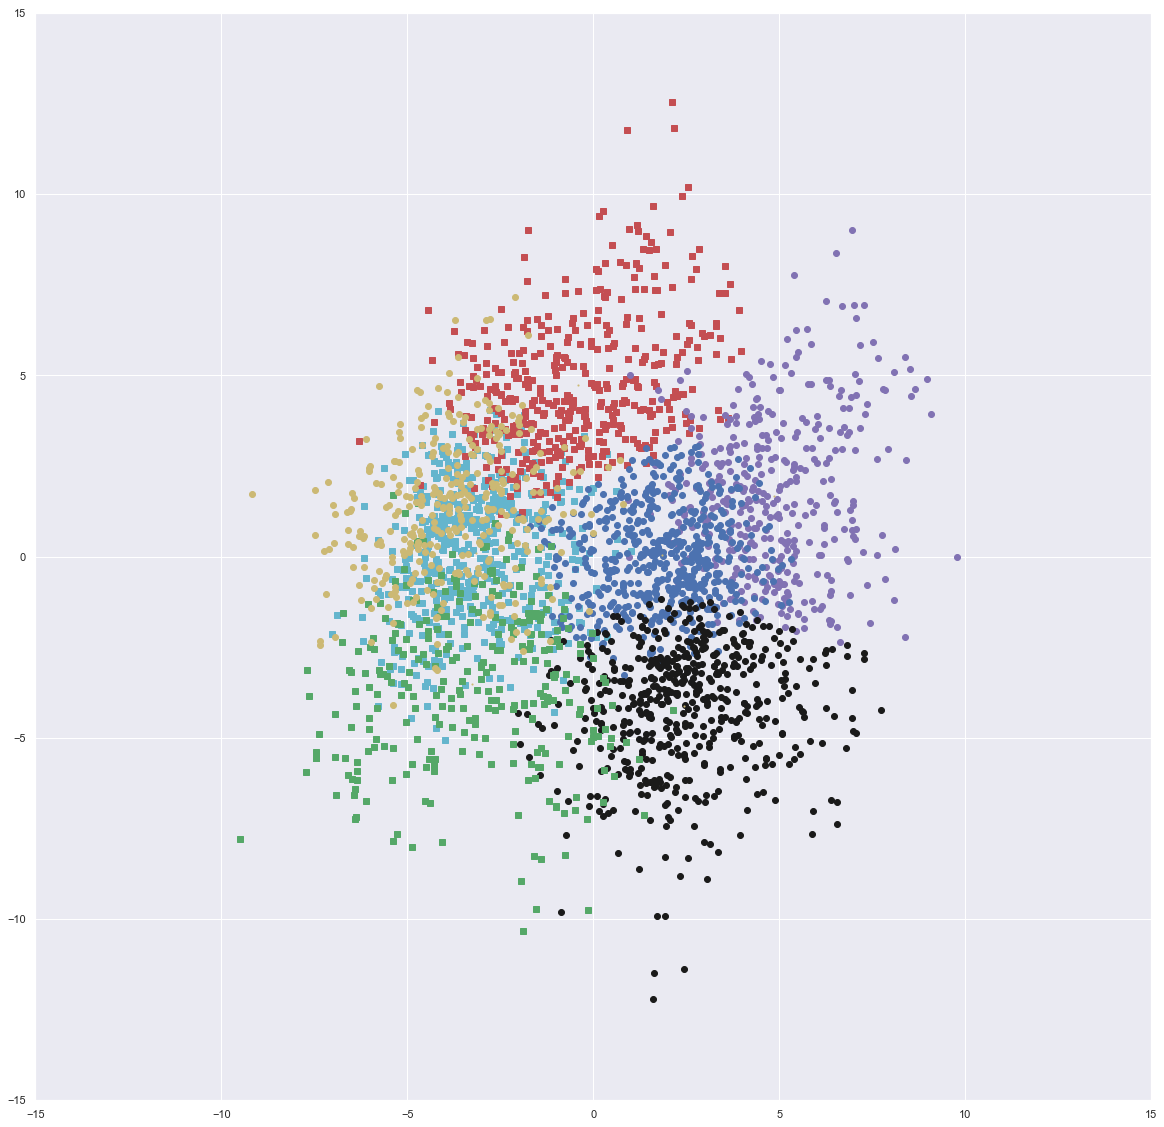

In [1855]:
plt.figure(figsize=(20,20))
plt.plot(pre90s_z1[pre90s_idx7==0,0],pre90s_z1[pre90s_idx7==0,1],'sc',
     pre90s_z1[pre90s_idx7==1,0],pre90s_z1[pre90s_idx7==1,1],'sr',
     pre90s_z1[pre90s_idx7==2,0],pre90s_z1[pre90s_idx7==2,1],'om',
     pre90s_z1[pre90s_idx7==3,0],pre90s_z1[pre90s_idx7==3,1],'ob',
     pre90s_z1[pre90s_idx7==4,0],pre90s_z1[pre90s_idx7==4,1],'ok',
     pre90s_z1[pre90s_idx7==5,0],pre90s_z1[pre90s_idx7==5,1],'sg',
     pre90s_z1[pre90s_idx7==6,0],pre90s_z1[pre90s_idx7==6,1],'oy')
plt.plot(pre90s_kmeans_x[:,0],pre90s_kmeans_x[:,1],'sy',markersize=1)
plt.xlim(-15.0, 15.0)
plt.ylim(-15.0, 15.0)
show()


The 7 clusters are very clear for the pre90s dataset.

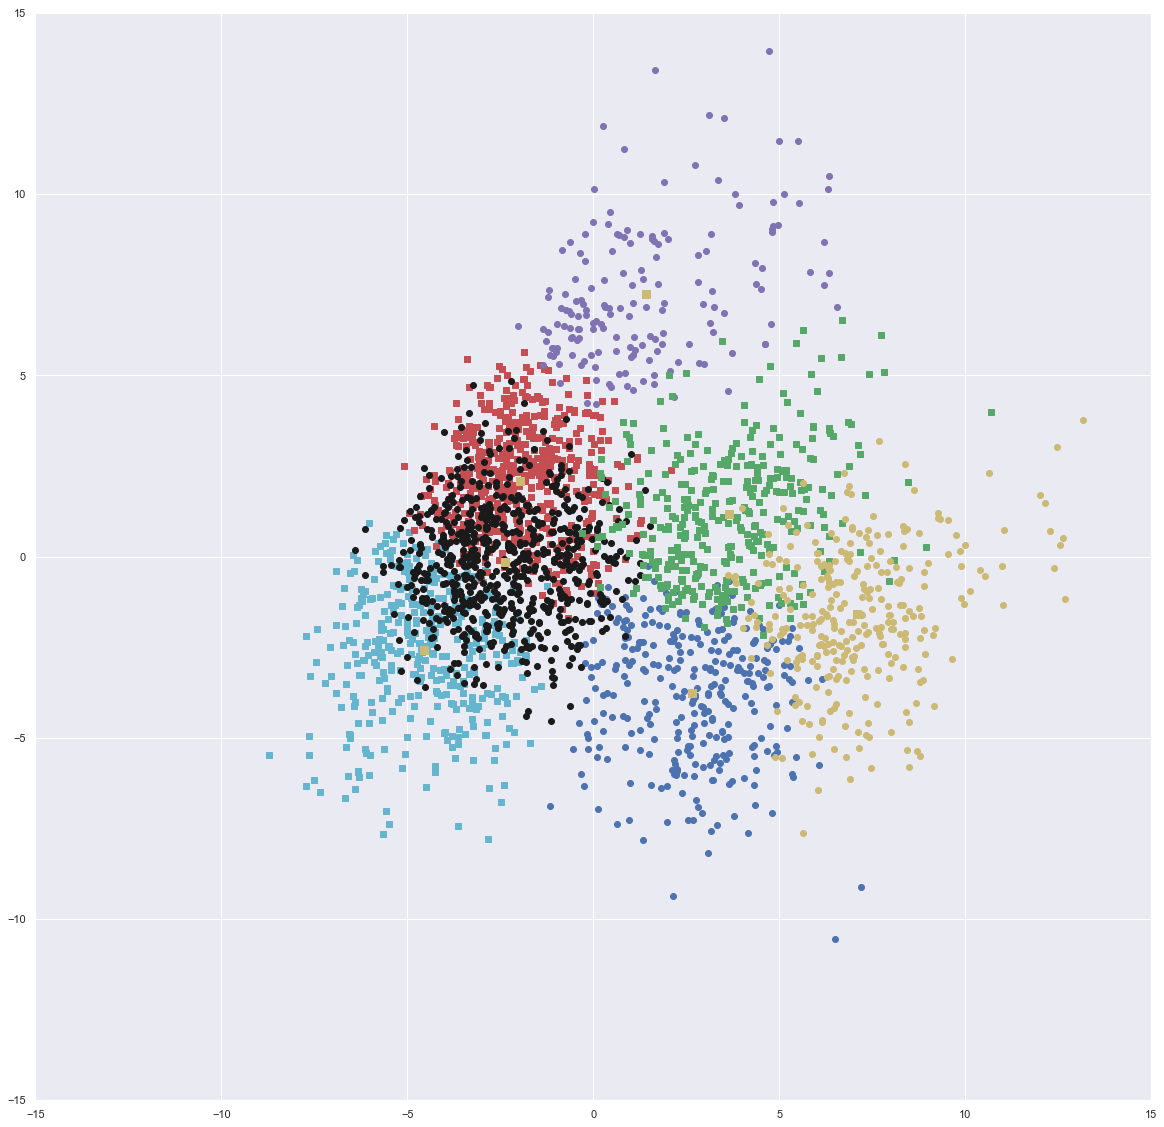

In [1856]:
_10s_idx7,_ = vq(_10s_z1,_10s_kmeans_x)
plt.figure(figsize=(20,20))
plt.plot(_10s_z1[_10s_idx7==0,0],_10s_z1[_10s_idx7==0,1],'sc',
     _10s_z1[_10s_idx7==1,0],_10s_z1[_10s_idx7==1,1],'sr',
     _10s_z1[_10s_idx7==2,0],_10s_z1[_10s_idx7==2,1],'om',
     _10s_z1[_10s_idx7==3,0],_10s_z1[_10s_idx7==3,1],'ob',
     _10s_z1[_10s_idx7==4,0],_10s_z1[_10s_idx7==4,1],'ok',
     _10s_z1[_10s_idx7==5,0],_10s_z1[_10s_idx7==5,1],'sg',
     _10s_z1[_10s_idx7==6,0],_10s_z1[_10s_idx7==6,1],'oy')
plt.plot(_10s_kmeans_x[:,0],_10s_kmeans_x[:,1],'sy',markersize=8)
plt.xlim(-15.0, 15.0)
plt.ylim(-15.0, 15.0)
show()

The 7 clusters are very distinguishable for the _10s dataset.

### Intepretation of clusters

#### For pre 1990 data

In [1857]:
pre90s_cluster = pre90s_idx7
type(pre90s_cluster)

numpy.ndarray

#### Intepraate through normalized dataset

Since in normalized dataset all the attributes are scaled to the same range, and the relative difference are also scaled to the same range, which makes it easy to have visual comparison.

<Figure size 432x288 with 0 Axes>

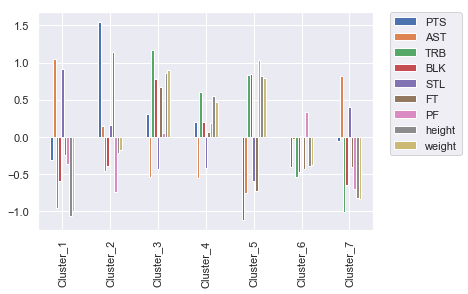

In [1858]:
##Add the cluster membership to first dataframe x
pre90s_z['cluster_ID'] = pre90s_cluster[:]
pre90s_z_cluster_sort = pre90s_z.sort_values('cluster_ID')

## Sort the players by cluster membership
cluster1 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 0]
cluster2 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 1]
cluster3 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 2]
cluster4 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 3]
cluster5 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 4]
cluster6 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 5]
cluster7 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 6]

#calculate mean values for each clusters
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())
c5means = pd.DataFrame(cluster5.mean())
c6means = pd.DataFrame(cluster6.mean())
c7means = pd.DataFrame(cluster7.mean())

summary = pd.concat([c1means, c2means, c3means, c4means, c5means, c6means, c7means], axis=1, join_axes = [c1means.index])

## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7']

summary_feature = summary.loc[['PTS','AST','TRB','BLK','STL','FT','PF','height','weight']]
summary_feature = summary_feature.transpose()
plt.figure()
summary_feature.plot(kind ='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) ## to move the legend outside of plot
plt.show()

#### Intepraate through unnormalized dataset

Unnormalized dataset helps to see the real facts of attributes of each cluster.

In [1859]:
pre90s_all['cluster_ID'] = pre90s_cluster[:]
pre90s_all_cluster_sort = pre90s_all.sort_values('cluster_ID')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1860]:
cluster1 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 0]
cluster2 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 1]
cluster3 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 2]
cluster4 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 3]
cluster5 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 4]
cluster6 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 5]
cluster7 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 6]

Now, lets look at the characteristics of each cluster by calculating means of each clusters.

In [1861]:
#calculate mean values for each clusters
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())
c5means = pd.DataFrame(cluster5.mean())
c6means = pd.DataFrame(cluster6.mean())
c7means = pd.DataFrame(cluster7.mean())

In [1862]:
##Concatenate the seven dataframes along axis =1 using the index from c1means
summary = pd.concat([c1means, c2means, c3means, c4means, c5means, c6means, c7means], axis=1, join_axes = [c1means.index])

## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7']
print(summary)

                Cluster_1    Cluster_2    Cluster_3    Cluster_4    Cluster_5  \
Unnamed: 0    4300.553506  4731.420561  4868.237975  4559.398165  4858.560694   
Unnamed: 0.1  6572.107011  7195.509346  7393.524051  6947.779817  7380.992293   
Year          1981.789668  1983.476636  1983.974684  1982.814679  1983.980732   
Age             26.014760    26.502336    26.483544    25.954128    26.919075   
G               73.560886    75.880841    76.541772    72.724771    67.965318   
MP            1832.391144  2438.665888  2242.794937  1837.018349  1250.028902   
PER              0.289307     0.294643     0.296703     0.317971     0.355623   
TS%              0.512256     0.550834     0.586965     0.525279     0.504888   
3PAr             0.028039     0.028297     0.006319     0.009119     0.008277   
FTr              0.296801     0.324928     0.462494     0.318983     0.356667   
ORB%             3.443173     5.625467    10.177975     8.413761     9.184008   
DRB%             7.676568   

We can also understand the character of each cluster by selecting prominent players in each cluster. Here I use minutes played(MP) as the criteria for elite players, since usually the elite players are given more opportunites to carry the game. 

In [1863]:
cluster1.loc[cluster1['MP'] >= 3000]

,Unnamed: 0,Unnamed: 0.1,Year,Player,Pos,Age,Tm,G,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight,cluster_ID
683,3904,6002,1980,Micheal Ray,SG,24,NYK,82,3060.0,0.209412,...,6.341176,9.788235,3.117647,0.411765,4.223529,3.058824,14.752941,198.0,85.0,0
665,3886,5978,1980,Norm Nixon,PG,24,LAL,82,3226.0,0.166274,...,2.555487,7.164290,1.640422,0.156231,3.213887,2.689399,16.136392,188.0,77.0,0
452,3671,5669,1979,Randy Smith,SG,30,SDC,82,3111.0,0.192093,...,3.413693,4.570878,2.048216,0.057859,2.950820,2.048216,19.417551,190.0,81.0,0
412,3631,5610,1979,Norm Nixon,PG,23,LAL,82,3145.0,0.208331,...,2.644197,8.436248,2.300795,0.194595,2.644197,2.861685,16.071224,188.0,77.0,0
419,3638,5621,1979,Kevin Porter,PG,28,DET,82,3064.0,0.202089,...,2.455614,12.912533,1.856397,0.058747,3.959530,3.548303,14.804178,183.0,77.0,0
2060,5284,7974,1986,Maurice Cheeks,PG,29,PHI,82,3270.0,0.197064,...,2.587156,8.289908,2.278899,0.297248,2.620183,1.761468,13.937615,185.0,81.0,0
1184,4407,6729,1982,Micheal Ray,PG,26,NYK,82,3044.0,0.209330,...,6.681997,6.764783,2.519054,0.484888,3.441524,3.749014,17.373193,198.0,85.0,0
1165,4388,6704,1982,Norm Nixon,PG,26,LAL,82,3024.0,0.182143,...,2.095238,7.761905,1.571429,0.083333,2.833333,3.142857,17.142857,188.0,77.0,0
1685,4908,7431,1984,Norm Nixon,PG,28,SDC,82,3053.0,0.199279,...,2.393711,10.777596,1.108418,0.047167,3.030462,2.122502,16.402227,188.0,77.0,0
933,4156,6364,1981,Micheal Ray,SG,25,NYK,79,3175.0,0.193890,...,6.179528,7.109291,2.630551,0.396850,3.424252,2.925354,14.660787,198.0,85.0,0


In [1864]:
cluster2.loc[cluster2['MP'] >= 3100]

,Unnamed: 0,Unnamed: 0.1,Year,Player,Pos,Age,Tm,G,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight,cluster_ID
902,4125,6322,1981,Mike Mitchell,SF,25,CLE,82,3194.0,0.197245,...,5.658109,1.566688,0.710081,0.586099,1.972448,2.242956,22.677520,201.0,97.0,1
786,4008,6152,1981,Adrian Dantley,SF,24,UTA,80,3417.0,0.256014,...,5.362599,3.392450,1.148376,0.189640,2.971027,2.581212,25.833187,196.0,94.0,1
219,3437,5321,1978,Randy Smith,SG,29,BUF,82,3314.0,0.207483,...,3.367532,4.975256,1.868437,0.119493,3.106820,2.433313,21.954134,190.0,81.0,1
2660,5887,8869,1988,Michael Jordan,SG,24,CHI,82,3311.0,0.344669,...,4.881909,5.273331,2.816068,1.424343,2.739958,2.935669,31.183328,198.0,88.0,1
1040,4263,6521,1982,Adrian Dantley,SF,25,UTA,81,3222.0,0.270391,...,5.743017,3.620112,1.061453,0.156425,3.340782,2.815642,27.452514,196.0,94.0,1
2919,6148,9297,1989,Michael Jordan,SG,25,CHI,81,3255.0,0.343963,...,7.211060,7.188940,2.588018,0.718894,3.207373,2.731797,29.120737,198.0,88.0,1
2910,6139,9282,1989,Kevin Johnson,PG,22,PHO,81,3179.0,0.232148,...,3.850267,11.222397,1.528783,0.271784,3.646430,2.559295,18.685121,203.0,108.0,1
2389,5616,8469,1987,Michael Jordan,SG,23,CHI,82,3281.0,0.326973,...,4.718074,4.136544,2.589454,1.371533,2.984456,2.600427,33.366657,198.0,88.0,1
1954,5178,7804,1985,Micheal Ray,PG,29,NJN,82,3127.0,0.227950,...,5.261273,7.701951,2.797570,0.253278,2.866645,3.188999,18.984330,198.0,85.0,1
1788,5011,7574,1985,Larry Bird,SF,28,BOS,80,3161.0,0.301803,...,9.589370,6.047453,1.469155,1.116102,2.824423,2.368871,26.137298,206.0,99.0,1


Since we also want to explore the relationship between the traditional way of clustering players which is according to the position, with our new method, I will also use bar plot to observe the distribution of player position within each cluster.

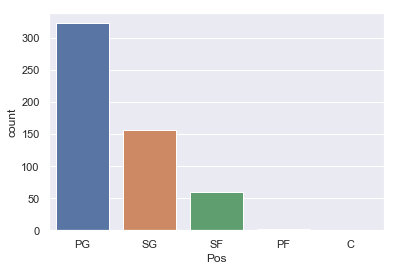

In [1865]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Pos", data=cluster1, order=["PG", "SG", "SF","PF","C"])

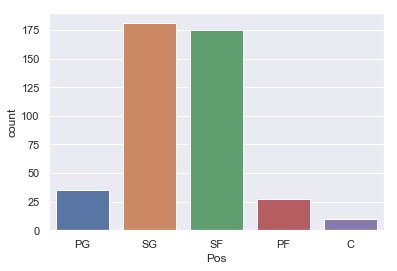

In [1866]:
ax = sns.countplot(x="Pos", data=cluster2,order=["PG", "SG", "SF","PF","C"])

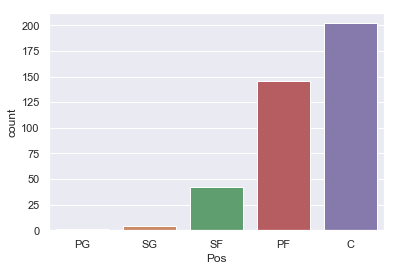

In [1867]:
ax = sns.countplot(x="Pos", data=cluster3,order=["PG", "SG", "SF","PF","C"])

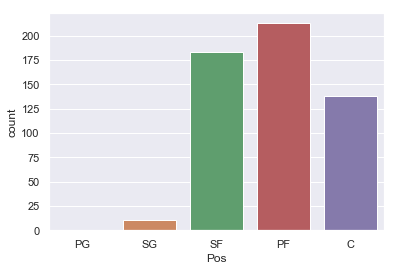

In [1868]:
ax = sns.countplot(x="Pos", data=cluster4,order=["PG", "SG", "SF","PF","C"])

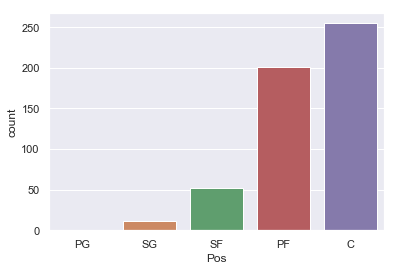

In [1869]:
ax = sns.countplot(x="Pos", data=cluster5,order=["PG", "SG", "SF","PF","C"])

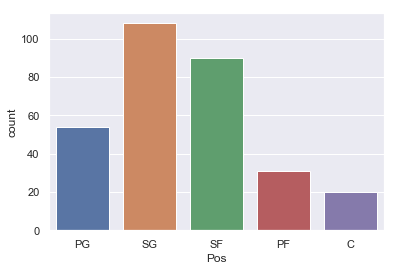

In [1870]:
ax = sns.countplot(x="Pos", data=cluster6,order=["PG", "SG", "SF","PF","C"])

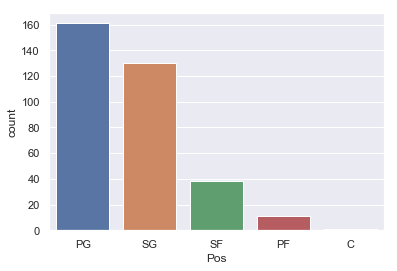

In [1871]:
ax = sns.countplot(x="Pos", data=cluster7,order=["PG", "SG", "SF","PF","C"])

#### Repeat similar approach for post 2010 data

In [1872]:
_10s_cluster = _10s_idx7
_10s_all['cluster_ID'] = _10s_cluster[:]
_10s_all_cluster_sort = _10s_all.sort_values('cluster_ID')

cluster1 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 0]
cluster2 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 1]
cluster3 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 2]
cluster4 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 3]
cluster5 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 4]
cluster6 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 5]
cluster7 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 6]

#calculate mean values for each clusters
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())
c5means = pd.DataFrame(cluster5.mean())
c6means = pd.DataFrame(cluster6.mean())
c7means = pd.DataFrame(cluster7.mean())

##Concatenate the three dataframes along axis =1 using the index from c1means
summary = pd.concat([c1means, c2means, c3means, c4means, c5means, c6means, c7means], axis=1, join_axes = [c1means.index])

## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7']
print(summary)

                 Cluster_1     Cluster_2     Cluster_3     Cluster_4  \
Unnamed: 0    14157.137056  13725.553734  14207.842424  13667.047923   
Unnamed: 0.1  22610.063452  21869.746812  22696.545455  21769.731629   
Year           2014.022843   2012.808743   2014.145455   2012.632588   
Age              26.324873     26.151184     27.163636     26.194888   
G                56.946701     67.557377     70.630303     60.364217   
MP             1016.634518   1886.646630   2418.721212   1077.763578   
PER               0.385565      0.315205      0.350858      0.463136   
TS%               0.479589      0.527860      0.575873      0.501939   
3PAr              0.373043      0.279317      0.283964      0.055949   
FTr               0.194848      0.271131      0.378085      0.310492   
ORB%              2.620051      2.512568      2.931515      9.127476   
DRB%             10.946701     10.419672     13.321818     18.616613   
TRB%              6.761421      6.439891      8.209091     13.83

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1873]:
cluster1.loc[cluster1['MP'] >= 1900 ]

,Unnamed: 0,Unnamed: 0.1,Year,Player,Pos,Age,Tm,G,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight,cluster_ID
11558,14900,23906,2016,Emmanuel Mudiay,PG,19,DEN,68,2068.0,0.172340,...,4.038685,6.475822,1.131528,0.609284,3.777563,2.454545,15.179884,196.0,90.0,0
11500,14842,23796,2016,Joe Johnson,SF,34,BRK,57,1934.0,0.199173,...,4.169597,4.318511,0.744571,0.037229,2.159255,1.861427,12.490176,201.0,90.0,0
11774,15117,24243,2017,Monta Ellis,SG,31,IND,74,1998.0,0.180180,...,3.675676,4.252252,1.423423,0.486486,2.432432,2.684685,11.351351,190.0,83.0,0
11761,15104,24224,2017,Matthew Dellavedova,PG,26,MIL,76,1986.0,0.170393,...,2.664653,6.471299,0.960725,0.000000,2.410876,2.773414,10.459215,193.0,89.0,0
11660,15002,24058,2016,Dion Waiters,SG,24,OKC,78,2152.0,0.157249,...,3.379182,2.576208,1.355019,0.250929,2.007435,2.392193,12.747212,193.0,102.0,0
9881,13201,20936,2011,Travis Outlaw,SF,26,NJN,82,2358.0,0.134351,...,4.961832,1.282443,0.519084,0.549618,1.083969,2.259542,11.541985,206.0,95.0,0
11185,14523,23235,2015,Luc Mbah,PF,28,PHI,67,1916.0,0.199165,...,6.162839,1.991649,1.521921,0.394572,1.860125,1.954071,12.400835,201.0,99.0,0
11164,14502,23203,2015,Zach LaVine,PG,19,MIN,77,1902.0,0.213880,...,4.050473,5.223975,1.022082,0.189274,3.652997,2.990536,14.725552,196.0,85.0,0
10836,14169,22631,2014,Ben McLemore,SG,20,SAC,82,2187.0,0.126749,...,3.868313,1.349794,0.740741,0.296296,1.580247,3.308642,11.851852,196.0,88.0,0
10880,14213,22712,2014,Tayshaun Prince,SF,33,MEM,76,1948.0,0.151540,...,4.324435,2.199179,0.720739,0.351129,0.757700,1.164271,8.390144,206.0,96.0,0


In [1874]:
cluster2.loc[cluster2['MP'] >= 1800]

,Unnamed: 0,Unnamed: 0.1,Year,Player,Pos,Age,Tm,G,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight,cluster_ID
11218,14556,23302,2015,Victor Oladipo,SG,22,ORL,72,2573.0,0.222464,...,4.225418,4.127478,1.678974,0.265838,2.854256,2.616401,18.076953,193.0,95.0,1
10536,13867,22117,2013,Luke Ridnour,SG,31,MIN,82,2474.0,0.189167,...,2.997575,4.525465,1.193209,0.218270,1.891673,2.721099,13.663703,188.0,79.0,1
9488,12797,20277,2010,Wesley Matthews,SG,23,UTA,82,2025.0,0.218667,...,3.395556,2.204444,1.137778,0.266667,1.653333,2.702222,13.671111,185.0,77.0,1
9355,12660,20027,2010,Wilson Chandler,SG,22,NYK,65,2320.0,0.212586,...,5.400000,2.141379,0.713793,0.760345,1.675862,2.855172,15.408621,203.0,102.0,1
9500,12809,20304,2010,Andre Miller,PG,33,POR,82,2500.0,0.260640,...,3.830400,6.408000,1.339200,0.129600,2.491200,2.433600,16.502400,206.0,102.0,1
10101,13426,21369,2012,Jrue Holiday,PG,21,PHI,65,2196.0,0.240984,...,3.475410,4.754098,1.688525,0.295082,2.213115,2.245902,14.409836,193.0,92.0,1
11581,14923,23941,2016,Elfrid Payton,PG,21,ORL,73,2145.0,0.233287,...,4.380420,7.854545,1.493706,0.335664,2.970629,2.668531,13.057343,193.0,83.0,1
10162,13487,21480,2012,Andre Miller,SG,35,DEN,66,1809.0,0.294527,...,4.398010,8.776119,1.253731,0.179104,3.522388,2.646766,12.716418,206.0,102.0,1
10448,13777,21950,2013,Joe Johnson,SG,31,BRK,72,2642.0,0.192127,...,2.970477,3.447388,0.667676,0.190765,1.676003,1.348978,15.942468,201.0,90.0,1
10106,13431,21385,2012,Andre Iguodala,SF,28,PHI,62,2209.0,0.286827,...,6.209144,5.524672,1.743775,0.488909,1.874151,1.499321,12.564962,198.0,97.0,1


In [1875]:
cluster3.loc[cluster3['MP'] >= 2800]

,Unnamed: 0,Unnamed: 0.1,Year,Player,Pos,Age,Tm,G,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight,cluster_ID
10632,13964,22278,2014,Carmelo Anthony,PF,29,NYK,77,2982.0,0.294567,...,7.509054,2.921529,1.146881,0.615694,2.390342,2.704225,25.496982,203.0,108.0,2
11465,14807,23736,2016,Gordon Hayward,SF,25,UTA,80,2893.0,0.227722,...,4.940200,3.683374,1.182164,0.335983,2.513654,2.277221,19.636364,203.0,102.0,2
11458,14800,23722,2016,James Harden,SG,26,HOU,82,3125.0,0.291456,...,5.771520,7.050240,1.601280,0.587520,4.308480,2.638080,27.371520,196.0,99.0,2
11306,14647,23472,2015,John Wall,PG,24,WAS,79,2837.0,0.252520,...,4.644343,10.050053,1.751146,0.571026,3.857596,2.284103,17.600282,193.0,88.0,2
10601,13933,22230,2013,Russell Westbrook,PG,24,OKC,82,2861.0,0.300734,...,5.385530,7.637889,1.824537,0.301992,3.435163,2.378189,23.945474,190.0,90.0,2
10351,13676,21798,2013,Stephen Curry,PG,24,GSW,78,2983.0,0.257057,...,3.789474,6.504861,1.520617,0.144821,2.896413,2.389541,21.554140,190.0,86.0,2
9603,12915,20482,2010,Deron Williams,PG,25,UTA,76,2802.0,0.264668,...,3.892934,10.252677,1.233405,0.205567,3.237687,2.672377,18.231263,190.0,90.0,2
10605,13937,22235,2013,Deron Williams,PG,28,BRK,78,2842.0,0.257143,...,2.938776,7.650950,0.950035,0.380014,2.761436,2.457424,18.696692,190.0,90.0,2
11439,14781,23692,2016,Paul George,SF,25,IND,81,2819.0,0.266903,...,7.189784,4.201490,1.941114,0.370344,3.384179,2.937212,23.931891,206.0,99.0,2
11002,14338,22926,2015,Eric Bledsoe,PG,25,PHO,81,2800.0,0.236571,...,5.438571,6.338571,1.632857,0.578571,3.522857,2.430000,17.704286,185.0,86.0,2


In [1876]:
cluster4.loc[cluster4['MP'] >= 2900]

,Unnamed: 0,Unnamed: 0.1,Year,Player,Pos,Age,Tm,G,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight,cluster_ID


In [1877]:
cluster5.loc[cluster5['MP'] >= 1800]

,Unnamed: 0,Unnamed: 0.1,Year,Player,Pos,Age,Tm,G,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight,cluster_ID
12035,15379,24685,2017,Thaddeus Young,PF,28,IND,74,2237.0,0.239785,...,7.225749,1.963344,1.834600,0.482789,1.544926,2.172553,13.099687,203.0,100.0,4
11021,14357,22959,2015,Kentavious Caldwell-Pope,SG,21,DET,82,2587.0,0.155856,...,3.548512,1.516815,1.294163,0.250483,1.308079,2.240433,14.514109,196.0,92.0,4
11845,15188,24354,2017,Ersan Ilyasova,PF,29,TOT,82,2142.0,0.245378,...,8.084034,2.369748,0.974790,0.386555,1.949580,3.546218,18.000000,208.0,106.0,4
11813,15156,24307,2017,Maurice Harkless,SF,23,POR,77,2223.0,0.213765,...,5.522267,1.441296,1.376518,1.133603,1.376518,3.465587,12.518219,206.0,97.0,4
11811,15154,24305,2017,Tim Hardaway,SG,24,ATL,79,2154.0,0.254039,...,3.743733,3.041783,0.919220,0.250696,1.771588,1.721448,19.103064,183.0,79.0,4
11690,15033,24114,2017,Ryan Anderson,PF,28,HOU,72,2116.0,0.229679,...,5.614367,1.156900,0.544423,0.238185,0.935728,2.415879,16.655955,208.0,108.0,4
11039,14375,22991,2015,Robert Covington,SF,24,PHI,70,1956.0,0.270552,...,5.815951,1.932515,1.785276,0.570552,2.355828,3.478528,17.355828,206.0,97.0,4
11121,14458,23133,2015,Solomon Hill,SF,23,IND,82,2381.0,0.154221,...,4.747585,2.782024,0.997900,0.272155,1.738765,2.676186,11.022260,201.0,102.0,4
11886,15230,24416,2017,Jon Leuer,PF,27,DET,75,1944.0,0.262963,...,7.444444,2.055556,0.574074,0.481481,1.222222,2.685185,14.203704,208.0,103.0,4
11833,15176,24336,2017,Solomon Hill,SF,25,NOP,80,2374.0,0.121314,...,4.655434,2.138163,1.076664,0.485257,1.243471,2.759899,8.537489,201.0,102.0,4


In [1878]:
cluster6.loc[cluster6['MP'] >= 2000]

,Unnamed: 0,Unnamed: 0.1,Year,Player,Pos,Age,Tm,G,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight,cluster_ID
10019,13344,21203,2012,Andrew Bynum,C,24,LAL,60,2112.0,0.390341,...,12.085227,1.448864,0.460227,1.977273,2.590909,1.772727,19.142045,213.0,129.0,5
9650,12962,20560,2011,Michael Beasley,SF,22,MIN,73,2361.0,0.236341,...,6.236341,2.409149,0.823380,0.792884,2.973316,3.385006,21.362135,206.0,106.0,5
9591,12903,20463,2010,Gerald Wallace,SF,27,CHA,76,3119.0,0.211222,...,8.795127,1.858288,1.350433,0.957999,2.054505,2.239179,15.997435,201.0,97.0,5
9660,12972,20575,2011,Andray Blatche,PF,24,WAS,64,2172.0,0.280110,...,8.718232,2.386740,1.624309,0.845304,2.850829,3.016575,17.834254,211.0,106.0,5
12003,15347,24625,2017,Karl-Anthony Towns,C,21,MIN,82,3030.0,0.308911,...,11.964356,2.613861,0.677228,1.223762,2.518812,2.863366,24.487129,213.0,110.0,5
9620,12932,20509,2011,LaMarcus Aldridge,PF,25,POR,81,3211.0,0.241046,...,7.948926,1.905948,0.919340,1.053877,1.715353,2.466521,19.833074,211.0,117.0,5
11574,14916,23933,2016,Jabari Parker,PF,20,MIL,76,2408.0,0.221262,...,5.905316,1.943522,1.031561,0.433555,1.734219,2.302326,15.996678,203.0,113.0,5
9371,12676,20052,2010,Luol Deng,SF,24,CHI,70,2651.0,0.218634,...,6.952848,1.941909,0.896266,0.828367,1.819691,1.751792,16.703131,206.0,99.0,5
11858,15201,24375,2017,James Johnson,PF,29,MIA,76,2085.0,0.293525,...,6.474820,4.765468,1.312230,1.484892,2.952518,3.401439,16.834532,206.0,113.0,5
10007,13332,21184,2012,Chris Bosh,PF,27,MIA,57,2007.0,0.339013,...,8.107623,1.847534,0.914798,0.807175,2.098655,2.295964,18.385650,211.0,106.0,5


In [1879]:
cluster7.loc[cluster7['MP'] >= 2200]

,Unnamed: 0,Unnamed: 0.1,Year,Player,Pos,Age,Tm,G,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight,cluster_ID
9431,12737,20154,2010,Nene Hilario,C,27,DEN,82,2755.0,0.246969,...,8.193103,2.652632,1.502722,1.071506,1.633394,3.671869,14.831216,211.0,113.0,6
9426,12732,20147,2010,Brendan Haywood,C,30,TOT,77,2355.0,0.246115,...,10.929936,0.657325,0.397452,2.415287,1.513376,3.194904,10.761783,213.0,121.0,6
10793,14125,22559,2014,Amir Johnson,PF,26,TOR,77,2214.0,0.250407,...,8.211382,1.869919,0.910569,1.430894,2.000000,4.406504,12.991870,206.0,108.0,6
9440,12747,20167,2010,Dwight Howard,C,24,ORL,82,2843.0,0.303904,...,13.701020,1.823426,0.949701,2.887091,3.469574,3.634189,19.032008,211.0,120.0,6
11029,14365,22971,2015,Tyson Chandler,C,32,DAL,75,2286.0,0.316535,...,13.606299,1.322835,0.661417,1.433071,1.653543,2.661417,12.141732,216.0,108.0,6
11867,15210,24389,2017,DeAndre Jordan,C,28,LAC,81,2570.0,0.305370,...,15.604669,1.344747,0.728405,1.891051,1.624903,2.969650,14.414008,211.0,120.0,6
11151,14488,23180,2015,DeAndre Jordan,C,26,LAC,82,2820.0,0.268085,...,15.651064,0.778723,1.034043,2.336170,1.391489,3.127660,12.076596,211.0,120.0,6
9399,12704,20098,2010,Marc Gasol,C,25,MEM,69,2469.0,0.281409,...,9.331713,2.405832,1.006075,1.589307,1.968408,3.703524,14.697448,216.0,115.0,6
11057,14394,23036,2015,Andre Drummond,C,21,DET,82,2502.0,0.307914,...,15.884892,0.791367,1.050360,2.201439,1.726619,4.100719,16.258993,211.0,126.0,6
11091,14428,23089,2015,Marcin Gortat,C,30,WAS,82,2453.0,0.267102,...,10.522625,1.423563,0.719119,1.614350,1.467591,2.803098,14.690583,211.0,108.0,6


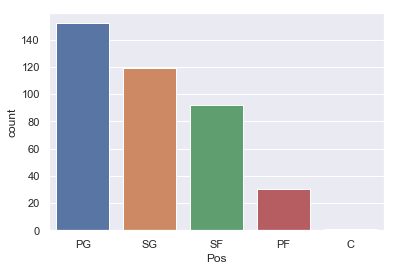

In [1880]:
ax = sns.countplot(x="Pos", data=cluster1, order=["PG", "SG", "SF","PF","C"])

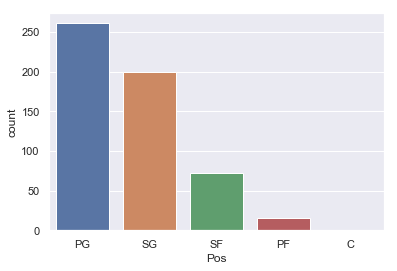

In [1881]:
ax = sns.countplot(x="Pos", data=cluster2, order=["PG", "SG", "SF","PF","C"])

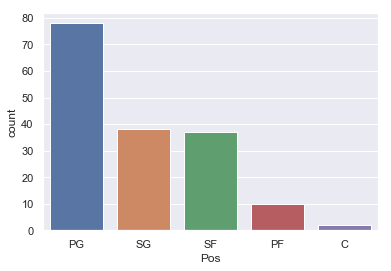

In [1882]:
ax = sns.countplot(x="Pos", data=cluster3, order=["PG", "SG", "SF","PF","C"])

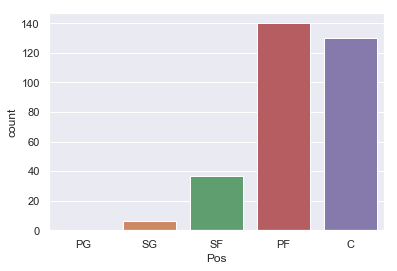

In [1883]:
ax = sns.countplot(x="Pos", data=cluster4, order=["PG", "SG", "SF","PF","C"])

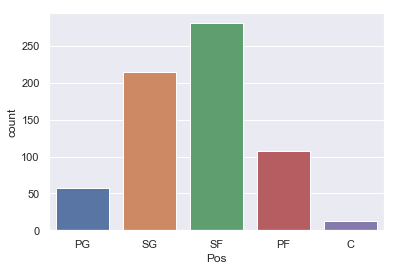

In [1884]:
ax = sns.countplot(x="Pos", data=cluster5, order=["PG", "SG", "SF","PF","C"])

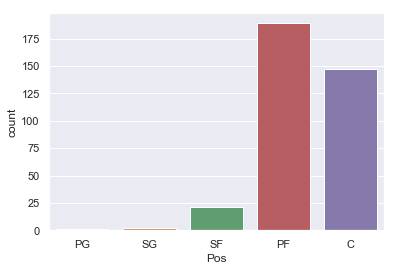

In [1885]:
ax = sns.countplot(x="Pos", data=cluster6, order=["PG", "SG", "SF","PF","C"])

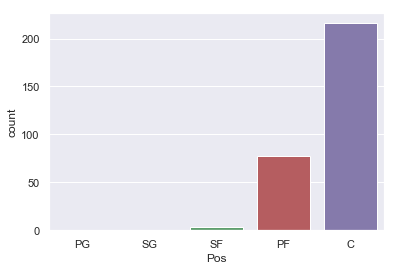

In [1886]:
ax = sns.countplot(x="Pos", data=cluster7, order=["PG", "SG", "SF","PF","C"])

In [1887]:
_10s_z['cluster_ID'] = _10s_cluster[:]
_10s_z_cluster_sort = _10s_z.sort_values('cluster_ID')

In [1888]:
cluster1 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 0]
cluster2 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 1]
cluster3 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 2]
cluster4 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 3]
cluster5 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 4]
cluster6 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 5]
cluster7 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 6]

In [1889]:
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())
c5means = pd.DataFrame(cluster5.mean())
c6means = pd.DataFrame(cluster6.mean())
c7means = pd.DataFrame(cluster7.mean())

<Figure size 432x288 with 0 Axes>

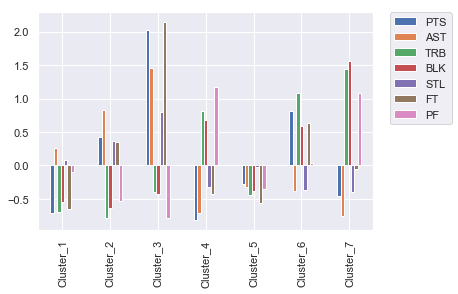

In [1890]:
summary = pd.concat([c1means, c2means, c3means, c4means, c5means, c6means, c7means], axis=1, join_axes = [c1means.index])

## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7']

summary_feature = summary.loc[['PTS','AST','TRB','BLK','STL','FT','PF']]
summary_feature = summary_feature.transpose()
plt.figure()
summary_feature.plot(kind ='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) ## to move the legend outside of plot
plt.show()